In [1]:
import logging
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (
        train_test_split,
        cross_validate,
        cross_val_predict,
        GridSearchCV
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    PowerTransformer,
    LabelEncoder,
    MinMaxScaler
)
from sklearn.tree import (
    DecisionTreeClassifier,
    plot_tree
)
from sklearn.metrics import(
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    DetCurveDisplay
)
logger = logging.getLogger(__name__)
logger.setLevel(logging.ERROR)

### **1. Data loading**


In [2]:
df_raw = pd.read_csv('../data/Maternal Health Risk Data Set.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [3]:
df_raw.sample(10, random_state=2025)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
109,32,140,100,7.9,98.0,78,high risk
185,55,100,65,6.1,98.0,66,low risk
402,35,100,70,7.8,98.0,60,low risk
800,32,120,80,6.8,98.0,70,mid risk
684,32,140,100,6.9,98.0,78,high risk
555,50,130,100,16.0,98.0,75,mid risk
34,21,75,50,6.1,98.0,70,low risk
689,40,160,100,19.0,98.0,77,high risk
172,20,100,90,7.1,98.0,88,low risk
528,15,78,49,7.5,98.0,77,low risk


### **2. Data preprocessing**


In [4]:
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.lower()
df_baking['risklevel']= df_baking['risklevel'].astype('category') 
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          1014 non-null   int64   
 1   systolicbp   1014 non-null   int64   
 2   diastolicbp  1014 non-null   int64   
 3   bs           1014 non-null   float64 
 4   bodytemp     1014 non-null   float64 
 5   heartrate    1014 non-null   int64   
 6   risklevel    1014 non-null   category
dtypes: category(1), float64(2), int64(4)
memory usage: 48.8 KB


|Name|Description|Type|Units|
|----|-----------|----|-----|
|Age|Years of Age|Int|Years|
|SystolicBP|Heartbeat artery pressure measurement|Int|mmHg|
|DiastolicBP|Resting artery pressure between beats|Int|mmHg|
|BS|Blood Sugar|Float|mmol/L|
|BodyTemp|Tempoerature of body|Float|°F|
|HeartRate|Rate of heart beating per minute|Int|BPM|
|RiskLevel|Level of Risk|Mapped|3 = high risk, 2 = mid risk, 1 = low risk|

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          1014 non-null   int64   
 1   systolicbp   1014 non-null   int64   
 2   diastolicbp  1014 non-null   int64   
 3   bs           1014 non-null   float64 
 4   bodytemp     1014 non-null   float64 
 5   heartrate    1014 non-null   int64   
 6   risklevel    1014 non-null   category
dtypes: category(1), float64(2), int64(4)
memory usage: 48.8 KB


In [6]:
df.sample(10, random_state=2025)

,age,systolicbp,diastolicbp,bs,bodytemp,heartrate,risklevel
109,32,140,100,7.9,98.0,78,high risk
185,55,100,65,6.1,98.0,66,low risk
402,35,100,70,7.8,98.0,60,low risk
800,32,120,80,6.8,98.0,70,mid risk
684,32,140,100,6.9,98.0,78,high risk
555,50,130,100,16.0,98.0,75,mid risk
34,21,75,50,6.1,98.0,70,low risk
689,40,160,100,19.0,98.0,77,high risk
172,20,100,90,7.1,98.0,88,low risk
528,15,78,49,7.5,98.0,77,low risk


### **3. Exploratory Data Analysis**


In [7]:
df_train, df_test = train_test_split(df,test_size=0.15,random_state=2025)
df_train,df_val = train_test_split(df_train,test_size=0.15, random_state=2025)
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          731 non-null    int64   
 1   systolicbp   731 non-null    int64   
 2   diastolicbp  731 non-null    int64   
 3   bs           731 non-null    float64 
 4   bodytemp     731 non-null    float64 
 5   heartrate    731 non-null    int64   
 6   risklevel    731 non-null    category
dtypes: category(1), float64(2), int64(4)
memory usage: 35.2 KB


In [8]:

display(df_train.describe().T)

,count,mean,std,min,25%,50%,75%,max
age,731.0,30.020520,13.533150,10.0,19.0,26.0,40.0,66.0
systolicbp,731.0,113.387141,18.512026,70.0,97.0,120.0,120.0,160.0
diastolicbp,731.0,76.734610,14.048181,49.0,65.0,80.0,90.0,100.0
bs,731.0,8.784583,3.383611,6.0,6.9,7.5,8.0,19.0
bodytemp,731.0,98.698222,1.414847,98.0,98.0,98.0,98.0,103.0
heartrate,731.0,74.421341,8.375128,7.0,70.0,76.0,80.0,90.0


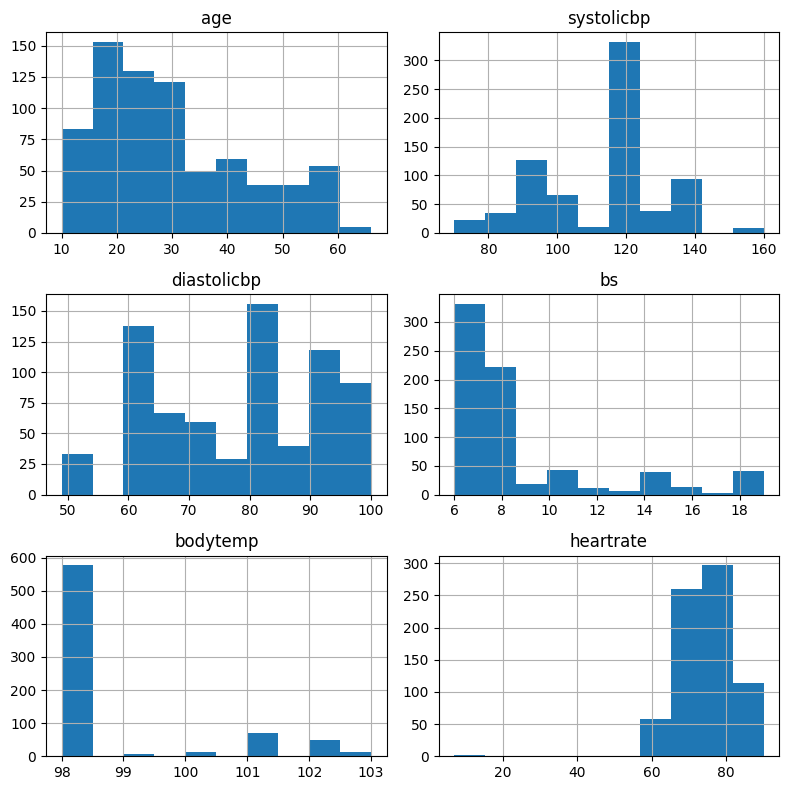

In [9]:

df_train.hist(figsize=(8,8))
plt.tight_layout()
plt.show()

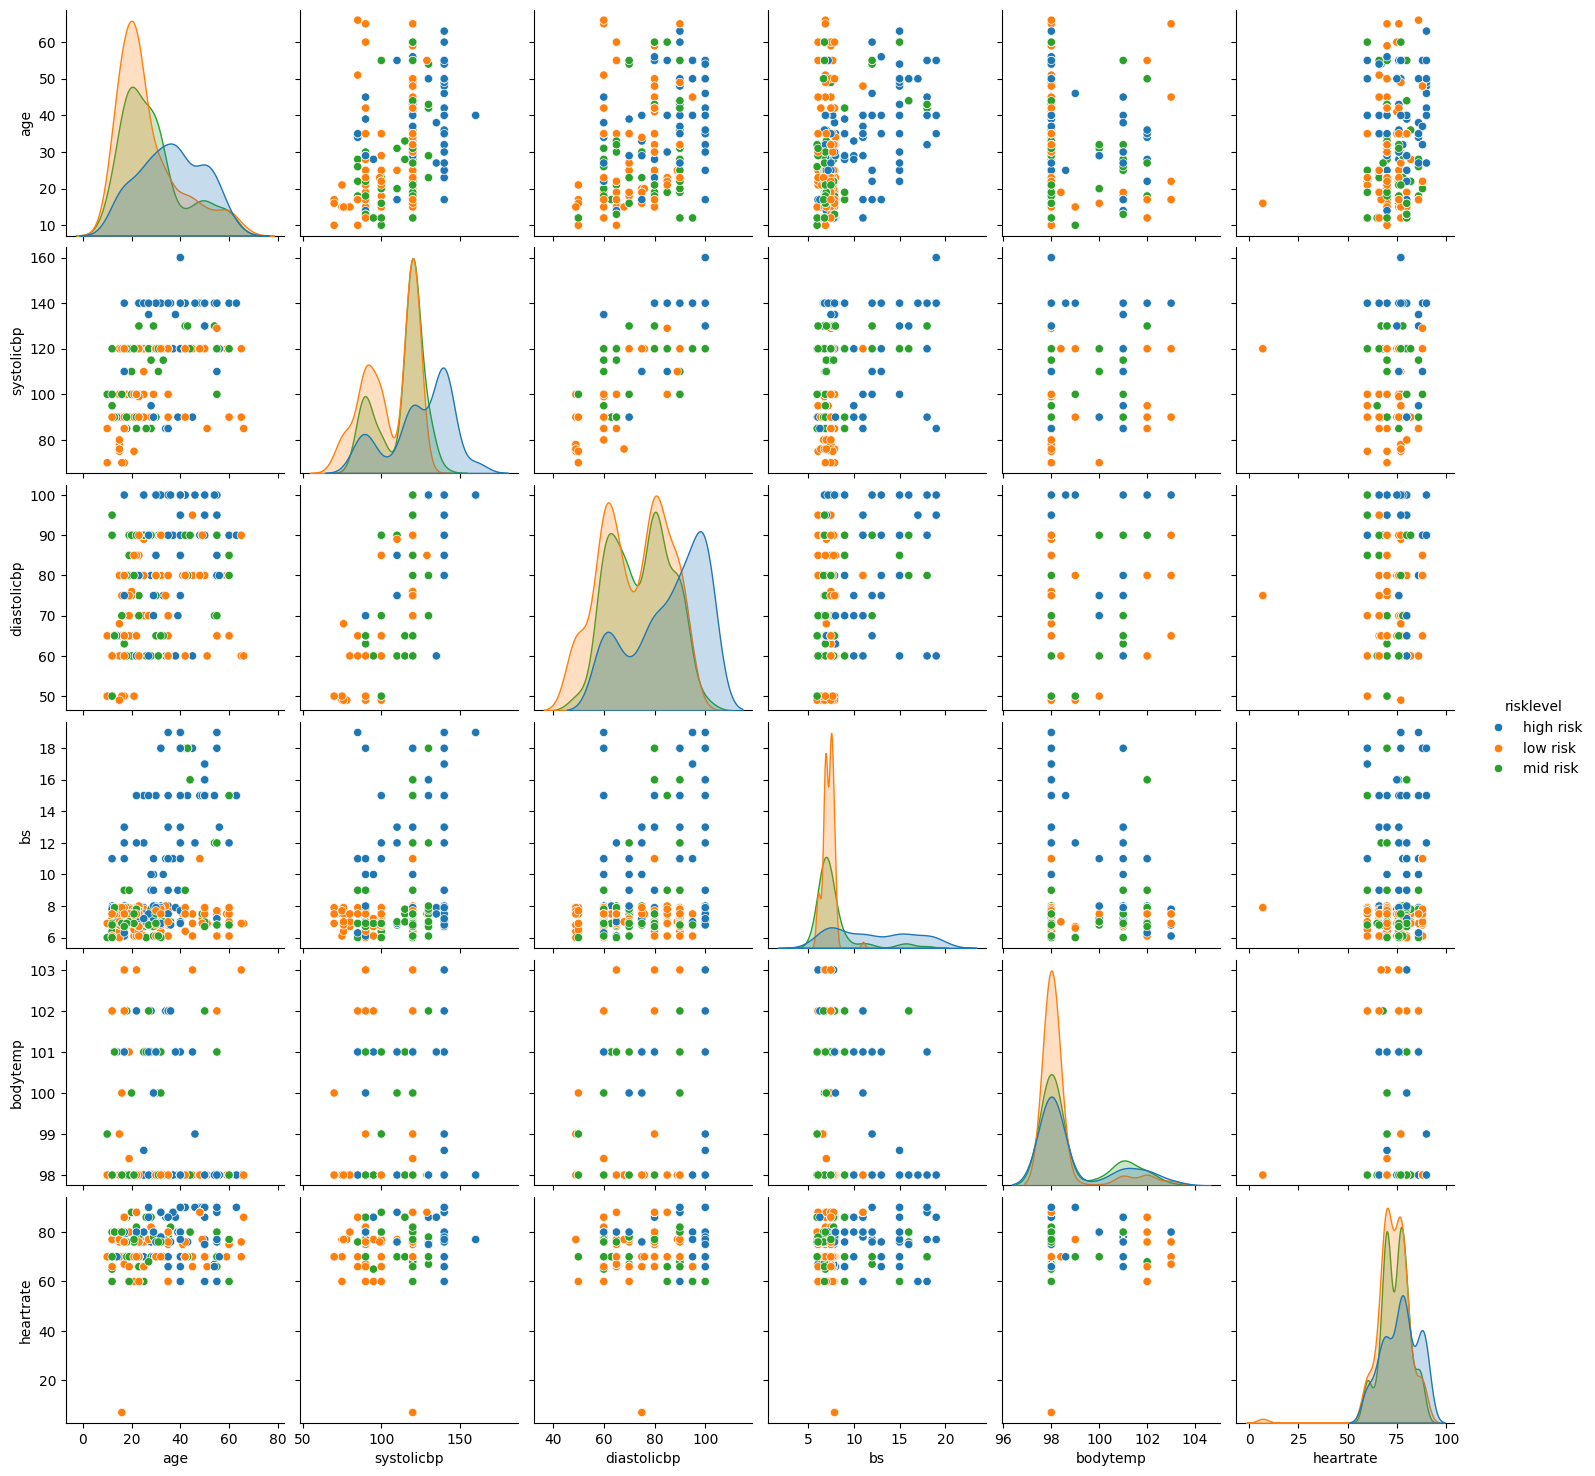

In [10]:
sns.pairplot(df_train, hue="risklevel")
plt.show()

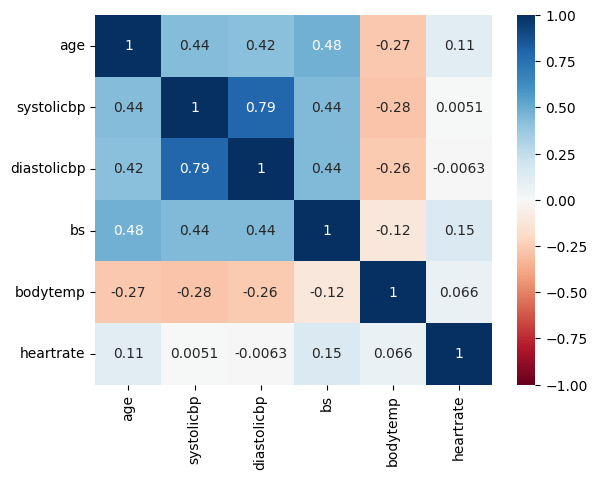

In [11]:
sns.heatmap(data=df_train.select_dtypes('number').corr(), vmin=-1, vmax=1, cmap='RdBu', annot=True)
plt.show()

### 4. Machine learning


In [12]:
X_train = df_train[['age', 'systolicbp','diastolicbp', 'bs','bodytemp', 'heartrate']].copy()
y_train = df_train['risklevel'].copy()
X_test = df_test[['age', 'systolicbp','diastolicbp', 'bs','bodytemp', 'heartrate']].copy()
y_test = df_test['risklevel'].copy()



In [13]:
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

In [14]:
clf_tree = DecisionTreeClassifier(class_weight='balanced', max_depth=3) # balancea de una manera ponderada
clf_tree.fit(X_train, y_train_enc)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

In [15]:
y_hat =  clf_tree.predict(X_test)
print(f'accuracy: {accuracy_score(y_test_enc,y_hat)*100:.1f}')
print(f'f1 score (macro): {f1_score(y_test_enc, y_hat, average="macro") * 100:.1f}')

accuracy: 70.6
f1 score (macro): 72.1


              precision    recall  f1-score   support

   high risk       0.79      0.81      0.80        27
    low risk       0.80      0.68      0.74        72
    mid risk       0.58      0.69      0.63        54

    accuracy                           0.71       153
   macro avg       0.72      0.73      0.72       153
weighted avg       0.72      0.71      0.71       153



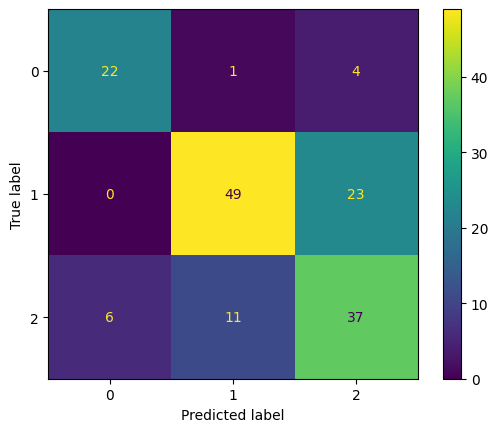

In [16]:
fig, ax = plt.subplots()  # Create a figure and an axis
print(classification_report(y_test_enc,y_hat,target_names = label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_test_enc, y_hat, ax=ax)  # Specify the axis
plt.show()  # show figure


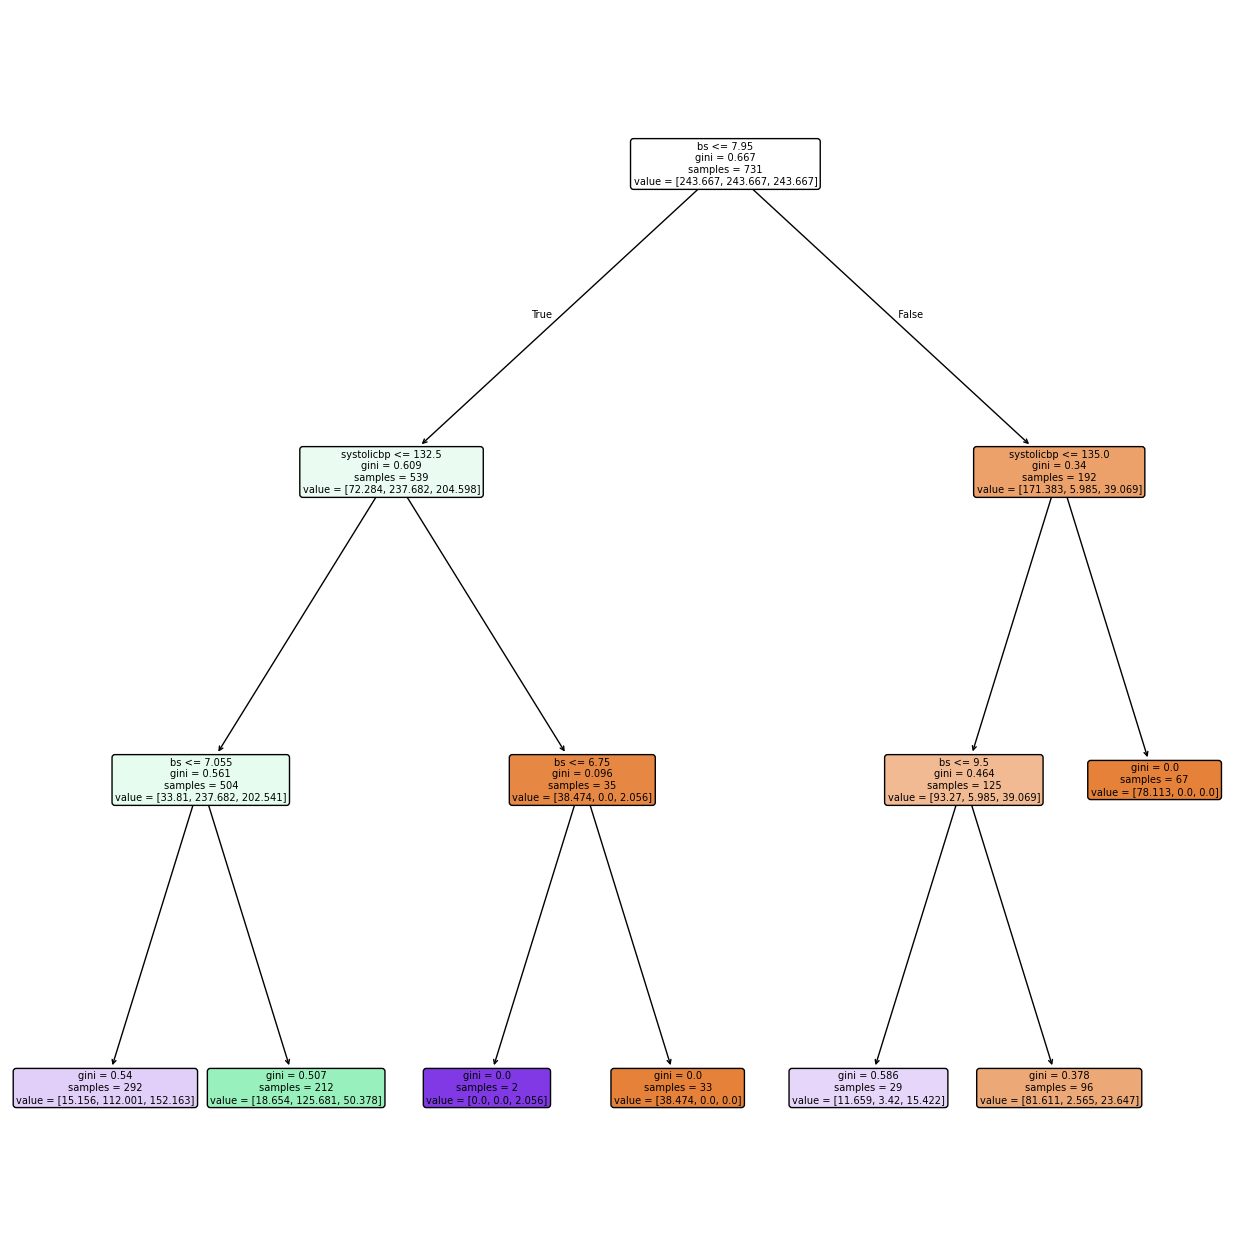

In [17]:
plt.figure(figsize=(16,16))
plot_tree(clf_tree,filled = True, feature_names=X_train.columns, rounded=True)
plt.show()

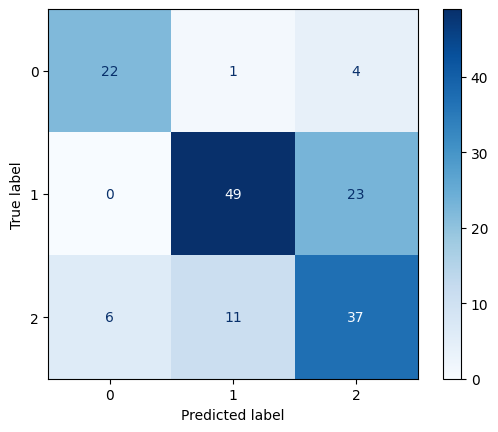

In [19]:
# Get predicted labels (not probabilities)
y_pred_class = clf_tree.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test_enc, y_pred_class)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_tree.classes_)
disp.plot(cmap="Blues")

plt.show()